### Import Packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load and Preprocessing Data


In [ ]:
df = pd.read_csv("BMRI.JK.csv")
df
df = df.rename(columns={"close_close_price_adjusted_for_splits": "close", "adj_close_adjusted_close_price_adjusted_for_splits_and_dividend_andor_capital_gain_distributions" : "adj_close"})


#### Memilih kolom mulai dari kolom ke-3 dan mereset index dataframe.

In [149]:
df = df.iloc[:, 2:].reset_index(drop=True)
df

,date,open,high,low,close,adj_close,volume
0,"Dec 17, 2025","4,990.00","5,025.00","4,960.00","5,025.00","5,025.00","94,254,100"
1,"Dec 16, 2025","5,025.00","5,050.00","4,920.00","5,000.00","5,000.00","137,373,200"
2,"Dec 15, 2025","4,820.00","5,025.00","4,790.00","4,990.00","4,990.00","122,451,500"
3,"Dec 12, 2025","4,980.00","4,980.00","4,820.00","4,820.00","4,820.00","111,830,600"
4,"Dec 11, 2025","5,000.00","5,050.00","4,830.00","4,950.00","4,950.00","151,956,700"
...,...,...,...,...,...,...,...
360,"Jun 25, 2024","5,925.00","5,975.00","5,825.00","5,925.00","5,383.40","159,983,800"
361,"Jun 24, 2024","6,075.00","6,125.00","6,000.00","6,000.00","5,451.55","58,831,900"
362,"Jun 21, 2024","6,050.00","6,200.00","6,025.00","6,125.00","5,565.12","184,240,600"
363,"Jun 20, 2024","5,825.00","5,950.00","5,750.00","5,950.00","5,406.12","82,660,000"


### Load and Preprocess Data Suku Bunga

In [150]:
df2 = pd.read_excel("BI-7Day-RR.xlsx")
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,BI-7Day-RR,BI-7Day-RR,BI-7Day-RR,BI-7Day-RR
2,NaN,NaN,NaN,NaN
3,NO,Tanggal,BI-7Day-RR,NaN
4,1,17 Desember 2025,4.75 %,NaN
5,2,19 November 2025,4.75 %,NaN
6,3,22 Oktober 2025,4.75 %,NaN
7,4,17 September 2025,4.75 %,NaN
8,5,20 Agustus 2025,5.00 %,NaN
9,6,16 Juli 2025,5.25 %,NaN


#### Mengambil baris dan kolom yang diperlukan serta mereset index

In [151]:
df2 = df2.iloc[4:, :3].reset_index(drop=True)
df2 

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,1,17 Desember 2025,4.75 %
1,2,19 November 2025,4.75 %
2,3,22 Oktober 2025,4.75 %
3,4,17 September 2025,4.75 %
4,5,20 Agustus 2025,5.00 %
5,6,16 Juli 2025,5.25 %
6,7,18 Juni 2025,5.50 %
7,8,21 Mei 2025,5.50 %
8,9,23 April 2025,5.75 %
9,10,19 Maret 2025,5.75 %


#### Mengubah nama kolom agar lebih deskriptif.

In [152]:
df2 = df2.rename(columns={"Unnamed: 1": "tanggal", "Unnamed: 2" : "bi_rate"})
df2

,Unnamed: 0,tanggal,bi_rate
0,1,17 Desember 2025,4.75 %
1,2,19 November 2025,4.75 %
2,3,22 Oktober 2025,4.75 %
3,4,17 September 2025,4.75 %
4,5,20 Agustus 2025,5.00 %
5,6,16 Juli 2025,5.25 %
6,7,18 Juni 2025,5.50 %
7,8,21 Mei 2025,5.50 %
8,9,23 April 2025,5.75 %
9,10,19 Maret 2025,5.75 %


### Perhitungan Suku Bunga(r)
Membersihkan data, menghitung r tahunan dari 12 data terbaru, dan nilai exp(r·dt)

In [ ]:
df2["tanggal"] = pd.to_datetime(df2["tanggal"], dayfirst=True, errors="coerce")

df2["bi_rate_dec"] = (
    df2["bi_rate"].astype(str)
      .str.replace("%", "", regex=False)
      .str.replace(" ", "", regex=False)
      .astype(float) / 100
)

df2 = df2.dropna(subset=["tanggal", "bi_rate_dec"]).sort_values("tanggal", ascending=False)

# ambil 12 bulan terbaru (1 tahun) lalu rata-rata
r_annual = df2.head(12)["bi_rate_dec"].mean()

dt = 1/252
exp_r_dt = np.exp(r_annual * dt)

print("Periode r (12 data terbaru):", df2.head(12)["tanggal"].min().date(), "s/d", df2.head(12)["tanggal"].max().date())
print("r_annual =", r_annual)
print("exp(r*dt) =", exp_r_dt)

Periode r (12 data terbaru): 2024-09-18 s/d 2025-11-19
r_annual = 0.05449999999999999
exp(r*dt) = 1.000216293229278


/var/folders/mb/6nd2fhb11gjd6v4v04_zl__h0000gn/T/ipykernel_4386/705839367.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["tanggal"] = pd.to_datetime(df2["tanggal"], dayfirst=True, errors="coerce")


#### Menyesuaikan nama kolom agar lebih ringkas dan mudah dibaca

In [154]:
df = df.rename(columns=lambda c: "Close" if "Close price" in c else c)
df = df.rename(columns=lambda c: "Adj Close" if "Adj Close" in c else c)
df

,date,open,high,low,close,adj_close,volume
0,"Dec 17, 2025","4,990.00","5,025.00","4,960.00","5,025.00","5,025.00","94,254,100"
1,"Dec 16, 2025","5,025.00","5,050.00","4,920.00","5,000.00","5,000.00","137,373,200"
2,"Dec 15, 2025","4,820.00","5,025.00","4,790.00","4,990.00","4,990.00","122,451,500"
3,"Dec 12, 2025","4,980.00","4,980.00","4,820.00","4,820.00","4,820.00","111,830,600"
4,"Dec 11, 2025","5,000.00","5,050.00","4,830.00","4,950.00","4,950.00","151,956,700"
...,...,...,...,...,...,...,...
360,"Jun 25, 2024","5,925.00","5,975.00","5,825.00","5,925.00","5,383.40","159,983,800"
361,"Jun 24, 2024","6,075.00","6,125.00","6,000.00","6,000.00","5,451.55","58,831,900"
362,"Jun 21, 2024","6,050.00","6,200.00","6,025.00","6,125.00","5,565.12","184,240,600"
363,"Jun 20, 2024","5,825.00","5,950.00","5,750.00","5,950.00","5,406.12","82,660,000"


### Estimasi Paramter Volatilitas
Membersihkan data harga, menghitung log return 12 bulan pertama, serta mengestimasi volatilitas harian dan tahunan.

In [ ]:
for c in ["open","high","low","close","adj_close","volume"]:
    if c in df.columns:
        df[c] = (
            df[c].astype(str)
                 .str.replace(",", "", regex=False)
                 .replace({"--": np.nan, "nan": np.nan})
        )
        df[c] = pd.to_numeric(df[c], errors="coerce")

# rapihin date & sort
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date", "adj_close"]).sort_values("date").reset_index(drop=True)

# 12 bulan pertama
start = df["date"].min()
cutoff = start + pd.DateOffset(months=12)
df_12m = df[df["date"] < cutoff].copy()

# log return
df_12m["log_ret"] = np.log(df_12m["adj_close"] / df_12m["adj_close"].shift(1))
log_ret = df_12m["log_ret"].dropna()

sigma_daily  = log_ret.std(ddof=1)
sigma_annual = sigma_daily * np.sqrt(252)
S0 = df_12m["adj_close"].iloc[-1]

print("12 bulan pertama:", df_12m["date"].min().date(), "s/d", df_12m["date"].max().date())
print("S0:", S0)
print("sigma_daily:", sigma_daily)
print("sigma_annual:", sigma_annual)


12 bulan pertama: 2024-06-19 s/d 2025-06-18
S0: 5075.0
sigma_daily: 0.023571045670055045
sigma_annual: 0.3741787499082689


### Parameter Model CRR
Menghitung parameter up, down, dan probabilitas risiko-netral pada model binomial CRR.


In [ ]:
dt = 1/252  

u_crr = np.exp(sigma_daily * np.sqrt(dt))
d_crr = np.exp(-sigma_daily * np.sqrt(dt))
p_crr = (np.exp(r_annual * dt) - d_crr) / (u_crr - d_crr)

print("=== CRR Parameters ===")
print("u_crr =", u_crr)
print("d_crr =", d_crr)
print("p_crr =", p_crr)

assert 0 < p_crr < 1, "p_crr harus di antara 0 dan 1"


=== CRR Parameters ===
u_crr = 1.0014859392244075
d_crr = 0.9985162655148625
p_crr = 0.5724627958119721


### Parameter Empiris
Mengestimasi parameter up, down, dan probabilitas berdasarkan data historis.


In [ ]:
df_12m["faktor"] = df_12m["adj_close"] / df_12m["adj_close"].shift(1)
f = df_12m["faktor"].dropna()

# pisah naik vs turun
f_up = f[f >= 1]
f_down = f[f < 1]

u_emp = f_up.mean()
d_emp = f_down.mean()
p_emp = len(f_up) / len(f)

print("=== Empirical Parameters ===")
print("u_emp =", u_emp)
print("d_emp =", d_emp)
print("p_emp =", p_emp)

assert u_emp > 1, "u empiris harus > 1"
assert d_emp < 1, "d empiris harus < 1"
assert 0 < p_emp < 1, "p empiris harus di antara 0 dan 1"


=== Empirical Parameters ===
u_emp = 1.0162659042798559
d_emp = 0.9823150651159446
p_emp = 0.5254237288135594


### Binomial Tree Harga
Membangun pohon harga saham menggunakan model binomial CRR dan empiris.

In [ ]:
n = 10  

def build_binomial_tree_prices(S0, u, d, n):
    """
    Return: tree (shape: (n+1, n+1))
    tree[j, i] = harga pada step i dengan j kali 'down'
    """
    tree = np.full((n+1, n+1), np.nan, dtype=float)
    for i in range(n+1):          # waktu (step)
        for j in range(i+1):      # jumlah down
            tree[j, i] = S0 * (u ** (i - j)) * (d ** j)
    return tree

tree_crr = build_binomial_tree_prices(S0, u_crr, d_crr, n)
tree_emp = build_binomial_tree_prices(S0, u_emp, d_emp, n)

print("Tree CRR shape:", tree_crr.shape)
print("Tree Emp shape:", tree_emp.shape)

Tree CRR shape: (11, 11)
Tree Emp shape: (11, 11)


Mengonversi binomial tree ke bentuk DataFrame agar mudah dibaca.

In [159]:
def tree_to_df(tree, title="Tree"):
    n = tree.shape[1] - 1
    cols = [f"t{i}" for i in range(n+1)]
    idx  = [f"down{j}" for j in range(n+1)]
    df_tree = pd.DataFrame(tree, columns=cols, index=idx)
    return df_tree

df_tree_crr = tree_to_df(tree_crr, "CRR")
df_tree_emp = tree_to_df(tree_emp, "EMP")

df_tree_crr

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
down0,5075.0,5082.541142,5090.093489,5097.657058,5105.231867,5112.817931,5120.415268,5128.023894,5135.643826,5143.275080,5150.917674
down1,NaN,5067.470047,5075.000000,5082.541142,5090.093489,5097.657058,5105.231867,5112.817931,5120.415268,5128.023894,5135.643826
down2,NaN,NaN,5059.951267,5067.470047,5075.000000,5082.541142,5090.093489,5097.657058,5105.231867,5112.817931,5120.415268
down3,NaN,NaN,NaN,5052.443643,5059.951267,5067.470047,5075.000000,5082.541142,5090.093489,5097.657058,5105.231867
down4,NaN,NaN,NaN,NaN,5044.947158,5052.443643,5059.951267,5067.470047,5075.000000,5082.541142,5090.093489
down5,NaN,NaN,NaN,NaN,NaN,5037.461796,5044.947158,5052.443643,5059.951267,5067.470047,5075.000000
down6,NaN,NaN,NaN,NaN,NaN,NaN,5029.987541,5037.461796,5044.947158,5052.443643,5059.951267
down7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5022.524375,5029.987541,5037.461796,5044.947158
down8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5015.072282,5022.524375,5029.987541
down9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5007.631246,5015.072282


Menampilkan binomial tree harga berdasarkan parameter empiris.

In [160]:
df_tree_emp

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
down0,5075.0,5157.549464,5241.441670,5326.698459,5413.342026,5501.394929,5590.880092,5681.820813,5774.240766,5868.164014,5963.615008
down1,NaN,4985.248955,5066.338538,5148.747115,5232.496143,5317.607425,5404.103118,5492.005742,5581.338182,5672.123694,5764.385915
down2,NaN,NaN,4897.085152,4976.740671,5057.691858,5139.959790,5223.565884,5308.531906,5394.879978,5482.632579,5571.812556
down3,NaN,NaN,NaN,4810.480520,4888.727336,4968.246907,5049.059935,5131.187461,5214.650865,5299.471877,5385.672579
down4,NaN,NaN,NaN,NaN,4725.407486,4802.270511,4880.383784,4959.767639,5040.442745,5122.430104,5205.751062
down5,NaN,NaN,NaN,NaN,NaN,4641.838962,4717.342670,4794.074514,4872.054472,4951.302843,5031.840261
down6,NaN,NaN,NaN,NaN,NaN,NaN,4559.748342,4633.916772,4709.291619,4785.892505,4863.739375
down7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4479.109490,4551.966256,4626.008103,4701.254308
down8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4399.896730,4471.465029,4544.197451
down9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4322.084843,4392.387461


Menampilkan seluruh harga saham pada waktu akhir (terminal) untuk model CRR dan empiris.

In [ ]:
terminal_crr = tree_crr[:, n]  
terminal_emp = tree_emp[:, n]

print("Terminal prices CRR:", terminal_crr)
print("Terminal prices EMP:", terminal_emp)

Terminal prices CRR: [5150.91767447 5135.64382568 5120.41526794 5105.23186695 5090.09348881
 5075.         5059.95126743 5044.94715837 5029.98754051 5015.07228192
 5000.20125106]
Terminal prices EMP: [5963.61500807 5764.38591544 5571.81255618 5385.67257928 5205.75106193
 5031.84026133 4863.73937485 4701.25430814 4544.19745106 4392.38746104
 4245.64905369]


### Simulasi Monte Carlo Binomial (CRR)
Melakukan simulasi Monte Carlo untuk menghitung harga rata-rata dan interval kepercayaan 95% hingga 126 hari ke depan.

In [ ]:


def mc_mean_ci_binomial(S0, u, d, p, N, M=20000, seed=42):
    """
    Monte Carlo berbasis Binomial model.
    Return dataframe: day, mean, ci_low, ci_high
    """
    rng = np.random.default_rng(seed)
    means, lows, highs = [], [], []

    for i in range(1, N+1):
        k = rng.binomial(n=i, p=p, size=M)
        S_i = S0 * (u**k) * (d**(i - k))

        mean = S_i.mean()
        ci_low, ci_high = np.quantile(S_i, [0.025, 0.975])

        means.append(mean)
        lows.append(ci_low)
        highs.append(ci_high)

    return pd.DataFrame({
        "day": np.arange(1, N+1),
        "mean_price": means,
        "ci95_low": lows,
        "ci95_high": highs
    })
    
N = 126
M = 20000  

mc_crr = mc_mean_ci_binomial(S0, u_crr, d_crr, p_crr, N=N, M=M)
mc_crr.head()


,day,mean_price,ci95_low,ci95_high
0,1,5076.067353,5067.470047,5082.541142
1,2,5077.151484,5059.951267,5090.093489
2,3,5078.289538,5052.443643,5097.657058
3,4,5079.264511,5044.947158,5105.231867
4,5,5080.596519,5052.443643,5112.817931


### Simulasi Monte Carlo Binomial (Empiris)
Menghitung harga rata-rata dan interval kepercayaan 95% menggunakan parameter empiris.

In [163]:
mc_emp = mc_mean_ci_binomial(S0, u_emp, d_emp, p_emp, N=N, M=M)
mc_emp.head()


,day,mean_price,ci95_low,ci95_high
0,1,5075.517192,4985.248955,5157.549464
1,2,5075.926950,4897.085152,5241.441670
2,3,5076.942992,4810.480520,5326.698459
3,4,5076.874293,4725.407486,5413.342026
4,5,5079.738697,4802.270511,5501.394929


### Split Data Train dan Test
Membagi data historis menjadi data latih 12 bulan pertama dan data uji untuk evaluasi model.

In [ ]:
df = df.sort_values("date").reset_index(drop=True)

start = df["date"].min()
cutoff_12m = start + pd.DateOffset(months=12)

df_train = df[df["date"] < cutoff_12m].copy()
df_test  = df[df["date"] >= cutoff_12m].copy() 

N = len(df_test)
print("N (hari aktual untuk dibandingkan) =", N)

N (hari aktual untuk dibandingkan) = 127


### Evaluasi Model CRR
Membandingkan harga aktual dengan prediksi rata-rata Monte Carlo dan menghitung error.

In [ ]:
actual = df_test[["date", "adj_close"]].reset_index(drop=True).rename(columns={"adj_close":"actual"})


pred_crr = mc_crr[["mean_price"]].iloc[:N].reset_index(drop=True).rename(columns={"mean_price":"pred_mean_crr"})


comp_crr = pd.concat([actual, pred_crr], axis=1)

comp_crr["error_crr"] = comp_crr["pred_mean_crr"] - comp_crr["actual"]
comp_crr["abs_error_crr"] = comp_crr["error_crr"].abs()
comp_crr["ape_crr"] = comp_crr["abs_error_crr"] / comp_crr["actual"]  

comp_crr.head()


,date,actual,pred_mean_crr,error_crr,abs_error_crr,ape_crr
0,2025-06-19,4970.0,5076.067353,106.067353,106.067353,0.021342
1,2025-06-20,4930.0,5077.151484,147.151484,147.151484,0.029848
2,2025-06-23,4920.0,5078.289538,158.289538,158.289538,0.032173
3,2025-06-24,5025.0,5079.264511,54.264511,54.264511,0.010799
4,2025-06-25,4880.0,5080.596519,200.596519,200.596519,0.041106


### Evaluasi Model Empiris
Membandingkan harga aktual dengan prediksi Monte Carlo berbasis parameter empiris dan menghitung error.

In [ ]:
pred_emp = mc_emp[["mean_price"]].iloc[:N].reset_index(drop=True).rename(columns={"mean_price":"pred_mean_emp"})

comp_emp = pd.concat([actual, pred_emp], axis=1)

comp_emp["error_emp"] = comp_emp["pred_mean_emp"] - comp_emp["actual"]
comp_emp["abs_error_emp"] = comp_emp["error_emp"].abs()
comp_emp["ape_emp"] = comp_emp["abs_error_emp"] / comp_emp["actual"]

comp_emp.head()


,date,actual,pred_mean_emp,error_emp,abs_error_emp,ape_emp
0,2025-06-19,4970.0,5075.517192,105.517192,105.517192,0.021231
1,2025-06-20,4930.0,5075.926950,145.926950,145.926950,0.029600
2,2025-06-23,4920.0,5076.942992,156.942992,156.942992,0.031899
3,2025-06-24,5025.0,5076.874293,51.874293,51.874293,0.010323
4,2025-06-25,4880.0,5079.738697,199.738697,199.738697,0.040930


### Visualisasi Harga Aktual vs CRR

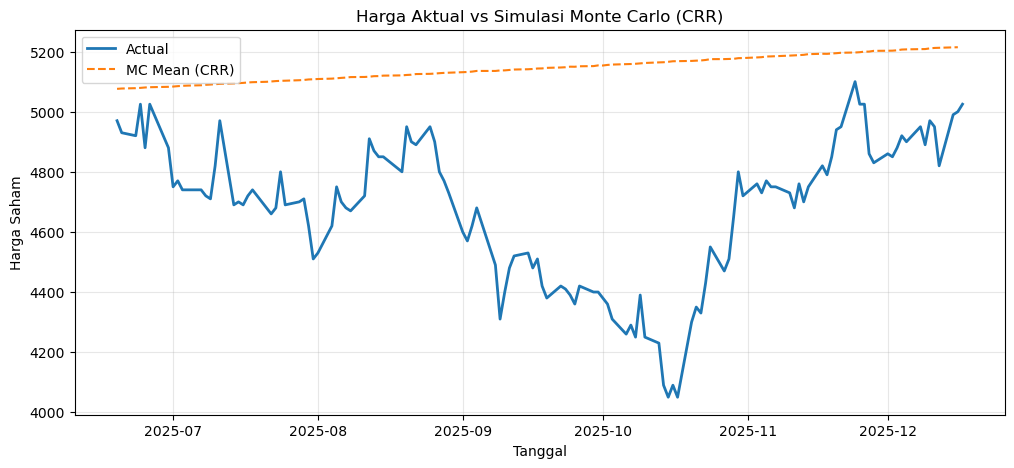

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(comp_crr["date"], comp_crr["actual"], label="Actual", linewidth=2)
plt.plot(comp_crr["date"], comp_crr["pred_mean_crr"], label="MC Mean (CRR)", linestyle="--")

plt.title("Harga Aktual vs Simulasi Monte Carlo (CRR)")
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Visualisasi Harga Aktual vs CRR

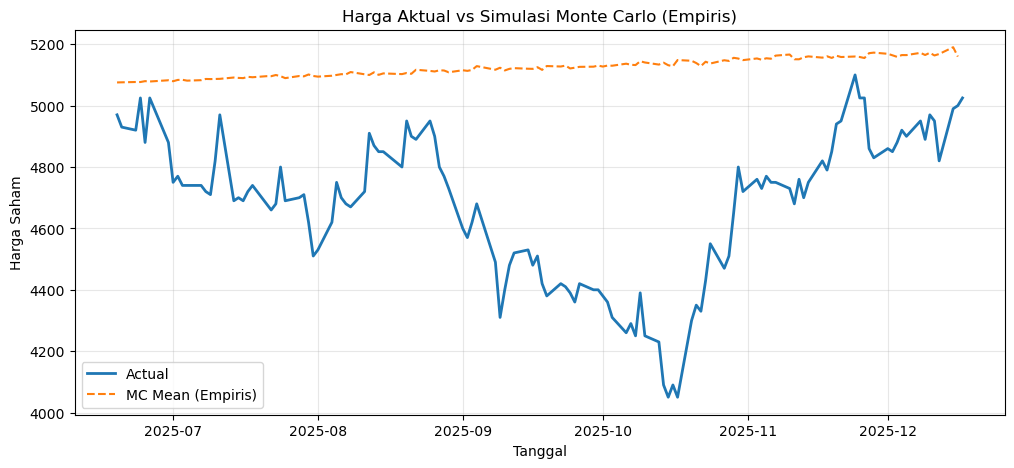

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(comp_emp["date"], comp_emp["actual"], label="Actual", linewidth=2)
plt.plot(comp_emp["date"], comp_emp["pred_mean_emp"], label="MC Mean (Empiris)", linestyle="--")

plt.title("Harga Aktual vs Simulasi Monte Carlo (Empiris)")
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Visualisasi Error Mutlak

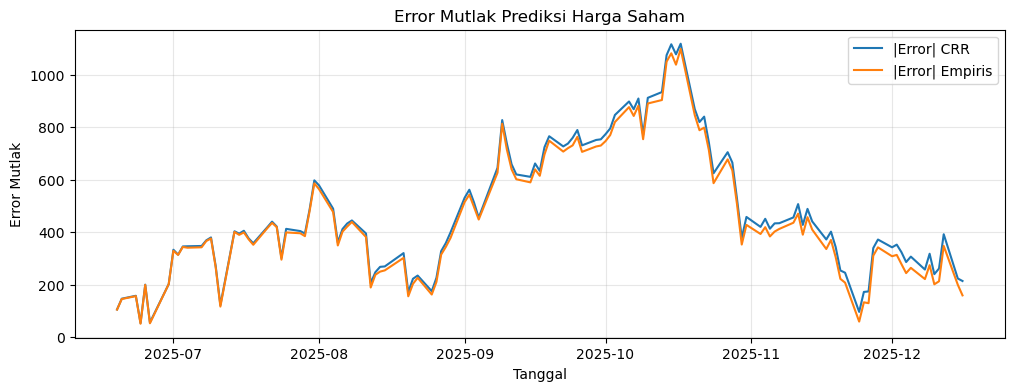

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(comp_crr["date"], comp_crr["abs_error_crr"], label="|Error| CRR")
plt.plot(comp_emp["date"], comp_emp["abs_error_emp"], label="|Error| Empiris")

plt.title("Error Mutlak Prediksi Harga Saham")
plt.xlabel("Tanggal")
plt.ylabel("Error Mutlak")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Boxplot Distribusi Error

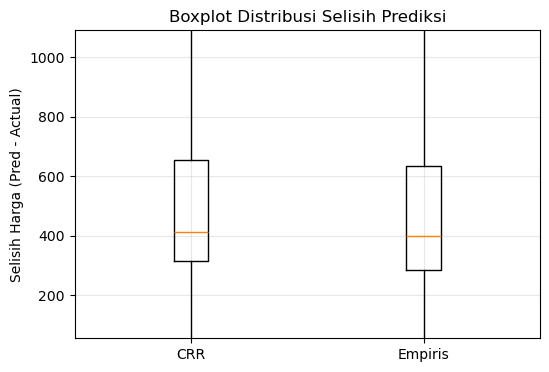

In [ ]:

data = [
    comp_crr["error_crr"].dropna().to_numpy(),
    comp_emp["error_emp"].dropna().to_numpy()
]

all_err = np.concatenate(data)
lo, hi = np.quantile(all_err, [0.01, 0.99])

plt.figure(figsize=(6,4))
plt.boxplot(data, labels=["CRR", "Empiris"], showfliers=True)
plt.ylim(lo, hi)
plt.title("Boxplot Distribusi Selisih Prediksi")
plt.ylabel("Selisih Harga (Pred - Actual)")
plt.grid(alpha=0.3)
plt.show()


### Statistik Error Prediksi
Menampilkan ringkasan statistik error untuk model CRR dan empiris.

In [173]:
comp_crr["error_crr"].describe(), comp_emp["error_emp"].describe()

(count     126.000000
 mean      474.909506
 std       242.922547
 min        54.264511
 25%       315.847311
 50%       412.832136
 75%       655.562537
 max      1118.151650
 Name: error_crr, dtype: float64,
 count     126.000000
 mean      454.142139
 std       240.584820
 min        51.874293
 25%       283.130564
 50%       397.989202
 75%       633.459862
 max      1098.464393
 Name: error_emp, dtype: float64)

### Tipe Data
Menampilkan tipe data untuk nilai aktual, prediksi, dan error pada model CRR.

In [174]:
comp_crr[["actual","pred_mean_crr","error_crr"]].dtypes


actual           float64
pred_mean_crr    float64
error_crr        float64
dtype: object

Menampilkan tipe data untuk nilai aktual, prediksi, dan error pada model Empiris.

In [175]:
comp_emp[["actual","pred_mean_emp","error_emp"]].dtypes


actual           float64
pred_mean_emp    float64
error_emp        float64
dtype: object

### Distogram Distribusi Selisih Prediksi

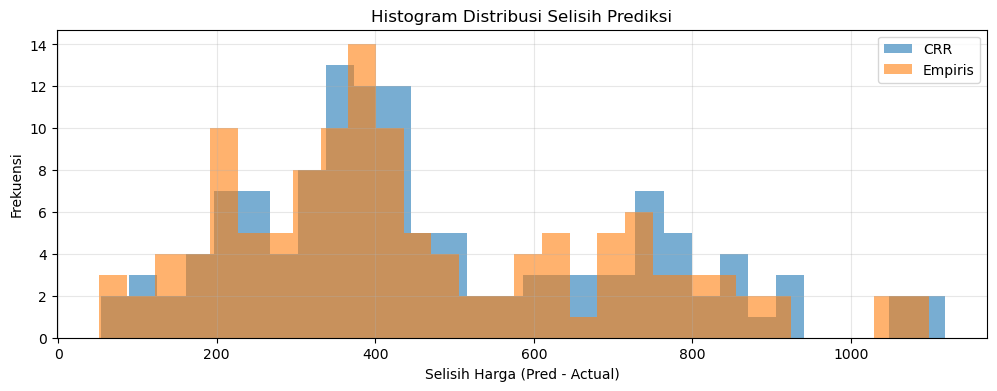

In [ ]:
plt.figure(figsize=(12,4))

plt.hist(comp_crr["error_crr"], bins=30, alpha=0.6, label="CRR")
plt.hist(comp_emp["error_emp"], bins=30, alpha=0.6, label="Empiris")

plt.title("Histogram Distribusi Selisih Prediksi")
plt.xlabel("Selisih Harga (Pred - Actual)")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Perbandingan Kinerja Model
Menghitung dan membandingkan MAE, MSE, dan MAPE antara model CRR dan empiris.

In [ ]:
def calc_metrics(actual, pred):
    actual = pd.to_numeric(actual, errors="coerce")
    pred   = pd.to_numeric(pred, errors="coerce")
    mask = actual.notna() & pred.notna() & (actual != 0)

    err = pred[mask] - actual[mask]

    mae  = np.mean(np.abs(err))
    mse  = np.mean(err**2)
    mape = np.mean(np.abs(err) / np.abs(actual[mask])) * 100

    return mae, mse, mape

mae_crr, mse_crr, mape_crr = calc_metrics(comp_crr["actual"], comp_crr["pred_mean_crr"])
mae_emp, mse_emp, mape_emp = calc_metrics(comp_emp["actual"], comp_emp["pred_mean_emp"])

results = pd.DataFrame({
    "Method": ["CRR", "Empiris"],
    "MAE": [mae_crr, mae_emp],
    "MSE": [mse_crr, mse_emp],
    "MAPE(%)": [mape_crr, mape_emp]
})

results

,Method,MAE,MSE,MAPE(%)
0,CRR,474.909506,284082.058993,10.466056
1,Empiris,454.142139,263666.764406,10.019201


### Model Terbaik Berdasarkan Error
Menentukan model dengan nilai MAE, MSE, dan MAPE terendah.

In [ ]:
winner_mae  = results.loc[results["MAE"].idxmin(), "Method"]
winner_mse  = results.loc[results["MSE"].idxmin(), "Method"]
winner_mape = results.loc[results["MAPE(%)"].idxmin(), "Method"]

print("Winner by MAE :", winner_mae)
print("Winner by MSE :", winner_mse)
print("Winner by MAPE:", winner_mape)


Winner by MAE : Empiris
Winner by MSE : Empiris
Winner by MAPE: Empiris
